In [20]:
import pandas as pd
import numpy as np

In [21]:
import sys
import os

In [22]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [23]:
from utils.load_data import load_instacart_data
data = load_instacart_data()

In [24]:
data

{'orders':          order_id  user_id eval_set  order_number  order_dow  \
 0         2539329        1    prior             1          2   
 1         2398795        1    prior             2          3   
 2          473747        1    prior             3          3   
 3         2254736        1    prior             4          4   
 4          431534        1    prior             5          4   
 ...           ...      ...      ...           ...        ...   
 3421078   2266710   206209    prior            10          5   
 3421079   1854736   206209    prior            11          4   
 3421080    626363   206209    prior            12          1   
 3421081   2977660   206209    prior            13          1   
 3421082    272231   206209    train            14          6   
 
          order_hour_of_day  days_since_prior_order  
 0                        8                     NaN  
 1                        7                    15.0  
 2                       12                   

In [25]:
orders = data['orders']

In [26]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [27]:
orders_prior = data['order_products_prior']

In [28]:
orders_train = data['order_products_train']

In [29]:
orders_prior.head()


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [30]:
orders_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [31]:
orders_train.shape

(1384617, 4)

In [32]:
orders.shape

(3421083, 7)

In [33]:
orders_prior.shape

(32434489, 4)

In [34]:
products = data['products']
aisles = data['aisles']
departments = data['departments']

In [35]:
products_merged = products.merge(aisles, on='aisle_id', how='left')

# Step 2: Merge that result with departments (on department_id)
products_merged = products_merged.merge(departments, on='department_id', how='left')

# Final result
products_merged.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [36]:
products_merged

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry
...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits,alcohol
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian,frozen
49685,49686,Artisan Baguette,112,3,bread,bakery
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care,pets


In [37]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Department')

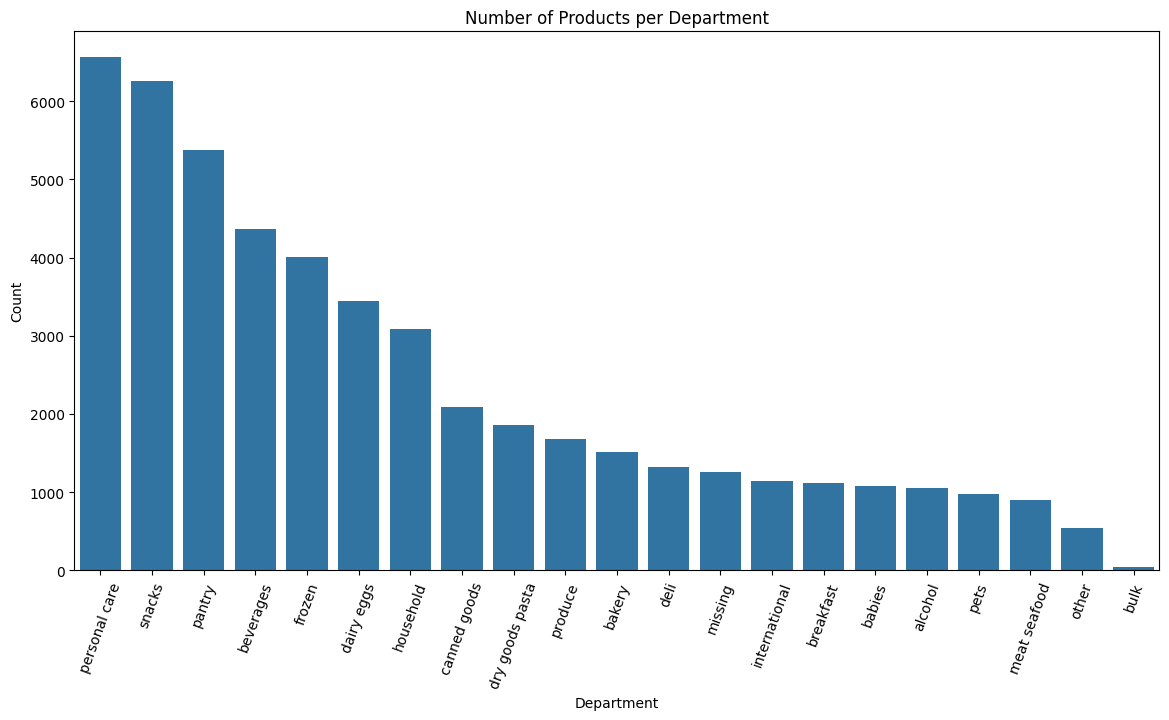

In [40]:
plt.figure(figsize = (14,7))
sns.countplot(x='department', data= products_merged, order = products_merged.department.value_counts().index)
plt.title('Number of Products per Department')
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.xlabel('Department')


Text(0.5, 0, 'Aisle')

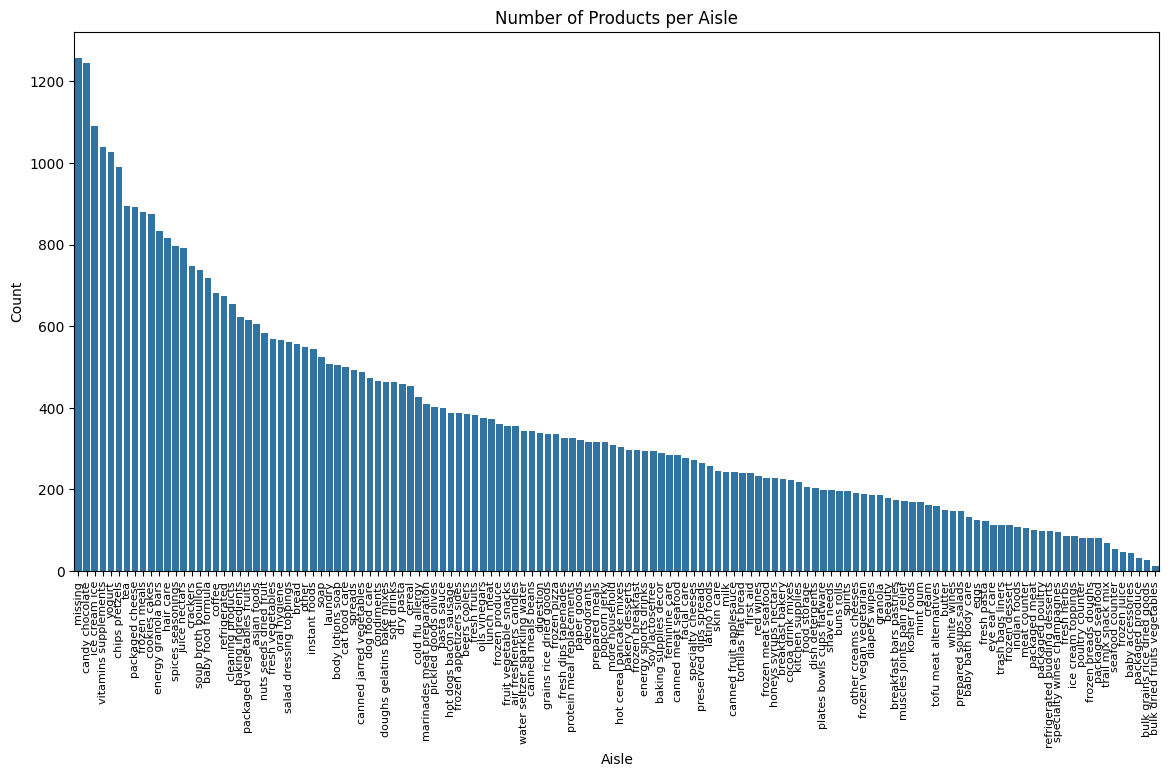

In [42]:
plt.figure(figsize = (14,7))
sns.countplot(x='aisle', data= products_merged, order = products_merged.aisle.value_counts().index)
plt.title('Number of Products per Aisle')
plt.xticks(rotation=90, fontsize = 8)
plt.ylabel('Count')
plt.xlabel('Aisle')

In [43]:
products_merged[products_merged['aisle']=='missing']


,product_id,product_name,aisle_id,department_id,aisle,department
37,38,Ultra Antibacterial Dish Liquid,100,21,missing,missing
71,72,Organic Honeycrisp Apples,100,21,missing,missing
109,110,Uncured Turkey Bologna,100,21,missing,missing
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21,missing,missing
416,417,Classics Baby Binks Easter Chocolate Bunny,100,21,missing,missing
...,...,...,...,...,...,...
49552,49553,Organic Plain Skyr,100,21,missing,missing
49574,49575,Chocolate Vanilla Malt Custard,100,21,missing,missing
49640,49641,"8\"" Pecan Pie",100,21,missing,missing
49663,49664,Lemon Cayenne Drinking Vinegar,100,21,missing,missing


In [44]:
#aisle 100 and dept 21 is missing values

In [45]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


Text(0, 0.5, 'Count')

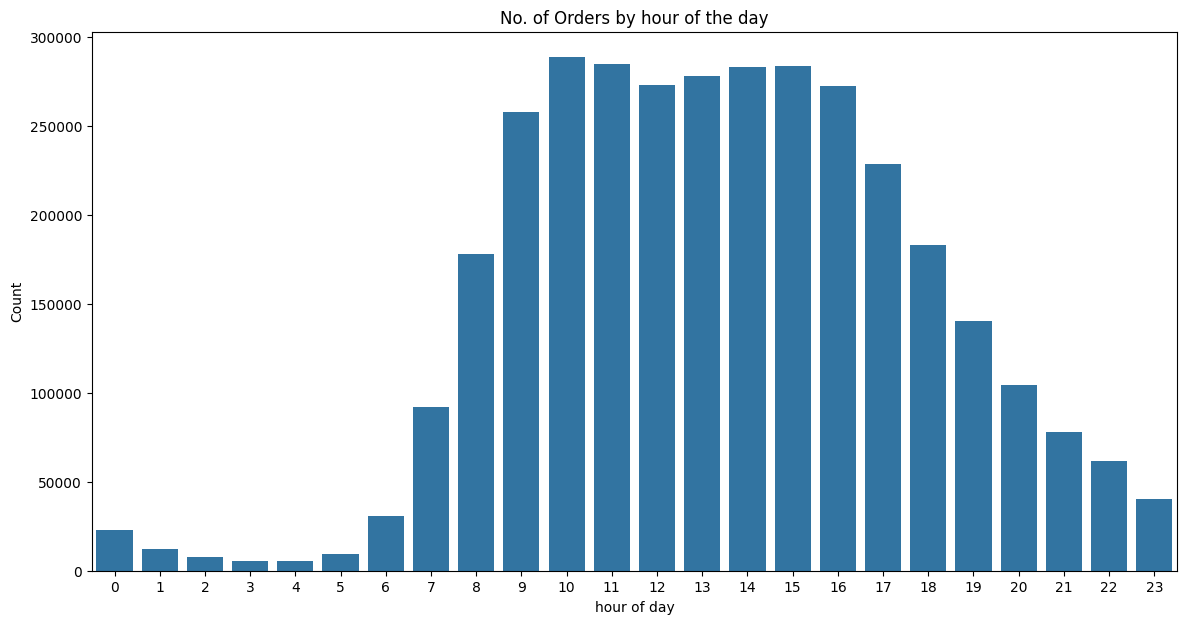

In [46]:
plt.figure(figsize = (14,7))
sns.countplot(x='order_hour_of_day', data= orders)
plt.title("No. of Orders by hour of the day")
plt.xlabel("hour of day")
plt.ylabel("Count")

Text(0.5, 0, 'Day')

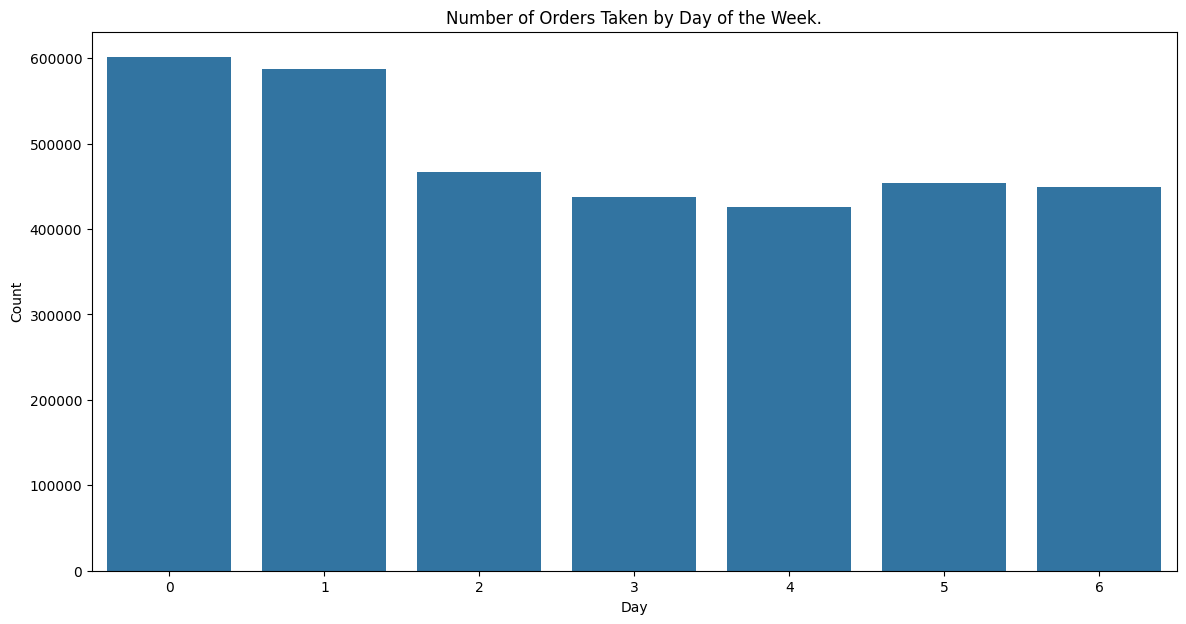

In [47]:
plt.figure(figsize = (14,7))
sns.countplot(x='order_dow', data= orders)
plt.title('Number of Orders Taken by Day of the Week.')
plt.ylabel('Count')
plt.xlabel('Day')

Text(0.5, 0, 'Days')

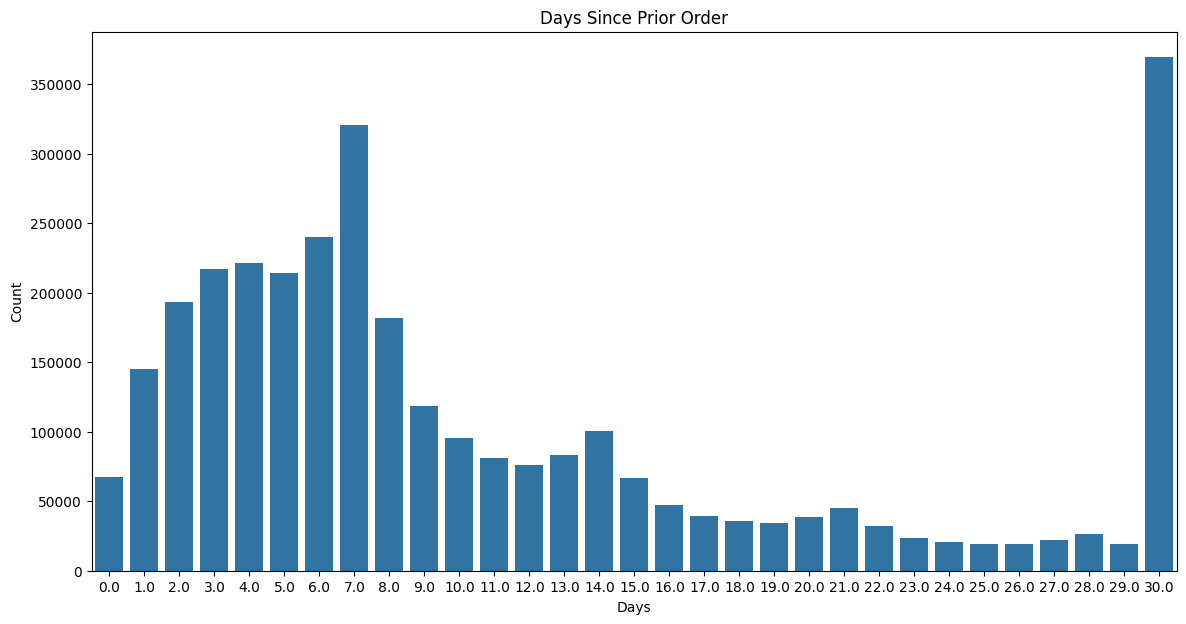

In [48]:
plt.figure(figsize = (14,7))
sns.countplot(x='days_since_prior_order', data= orders)
plt.title('Days Since Prior Order')
plt.ylabel('Count')
plt.xlabel('Days')

<Axes: title={'center': 'Top 10 Most Ordered Products'}, ylabel='product_name'>

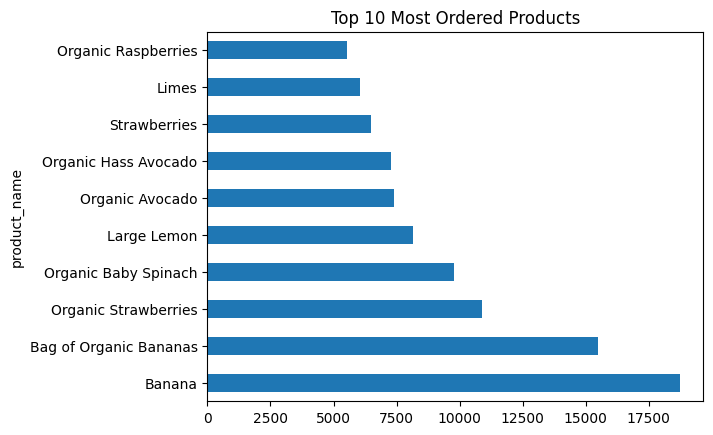

In [49]:
train_products = data['order_products_train'].merge(products_merged, on='product_id', how='left')
top_products = train_products['product_name'].value_counts().head(10)
top_products.plot(kind='barh', title='Top 10 Most Ordered Products')


<Axes: >

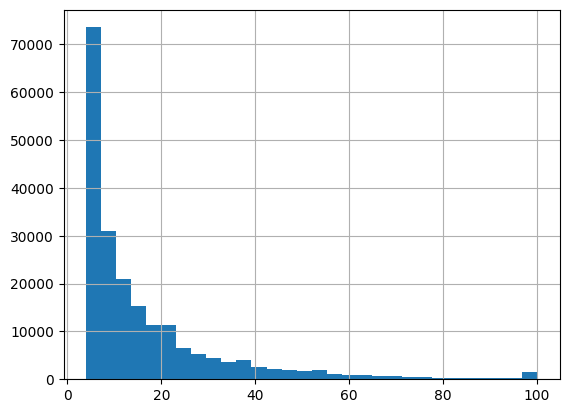

In [50]:
orders_per_user = orders.groupby('user_id')['order_number'].max()
orders_per_user.hist(bins=30)



In [51]:
reordered_ratio = train_products.groupby('product_name')['reordered'].mean().sort_values(ascending=False)


In [52]:
reordered_ratio

product_name
Premium Organic Quinoa                           1.0
Ultra Conditioning Lip Balm with Kokum Butter    1.0
Original Puffcorn                                1.0
Blood Orange Vodka                               1.0
Margherita Crispy Flatbread Pizza                1.0
                                                ... 
Dill Pickle Kale Chips                           0.0
Dill Chabis Pure Goat Milk Cheese                0.0
Dill & Garlic Raw Sauerkraut                     0.0
Mediterranean Platter                            0.0
Java Chip Ice Cream                              0.0
Name: reordered, Length: 39123, dtype: float64

In [53]:
prior_combined = orders_prior.merge(orders, on='order_id', how='left')
prior_combined = prior_combined.merge(products_merged, on='product_id', how='left')


In [54]:
prior_combined

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,25247,prior,24,2,6,21.0,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents,household
32434485,3421083,11352,7,0,25247,prior,24,2,6,21.0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers,snacks
32434486,3421083,4600,8,0,25247,prior,24,2,6,21.0,All Natural French Toast Sticks,52,1,frozen breakfast,frozen
32434487,3421083,24852,9,1,25247,prior,24,2,6,21.0,Banana,24,4,fresh fruits,produce


In [55]:
train_combined = orders_train.merge(orders, on='order_id', how='left')
train_combined = train_combined.merge(products_merged, on='product_id', how='left')

<Axes: >

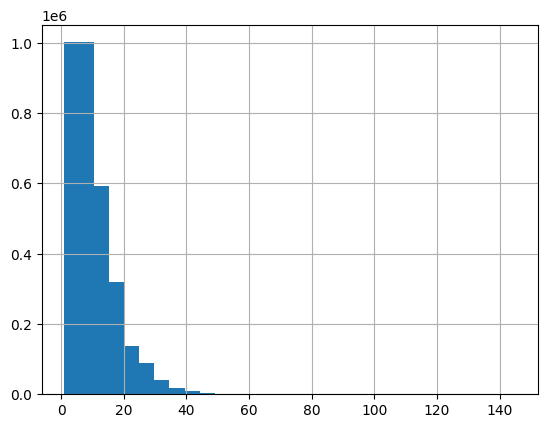

In [56]:
basket_size = prior_combined.groupby('order_id')['product_id'].count()
basket_size.hist(bins=30)

In [57]:
reorder_rate = prior_combined.groupby('product_name')['reordered'].mean().sort_values(ascending=False)
reorder_rate.head(10)

product_name
Raw Veggie Wrappers                         0.941176
Serenity Ultimate Extrema Overnight Pads    0.931034
Orange Energy Shots                         0.923077
Chocolate Love Bar                          0.920792
Soy Powder Infant Formula                   0.914286
Simply Sleep Nighttime Sleep Aid            0.911111
Energy Shot, Grape Flavor                   0.909091
Russian River Valley Reserve Pinot Noir     0.900000
Maca Buttercups                             0.900000
Sparking Water                              0.900000
Name: reordered, dtype: float64

<Axes: title={'center': 'Top Aisles'}, ylabel='aisle'>

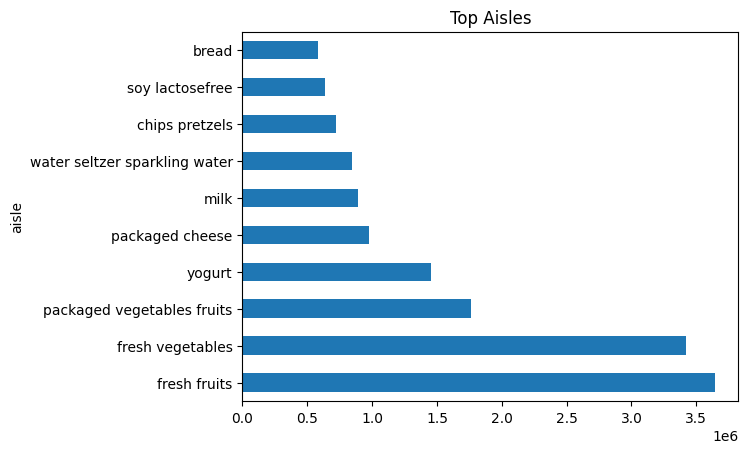

In [58]:
prior_combined['aisle'].value_counts().head(10).plot(kind='barh', title='Top Aisles')


<Axes: title={'center': 'Top Departments'}, ylabel='department'>

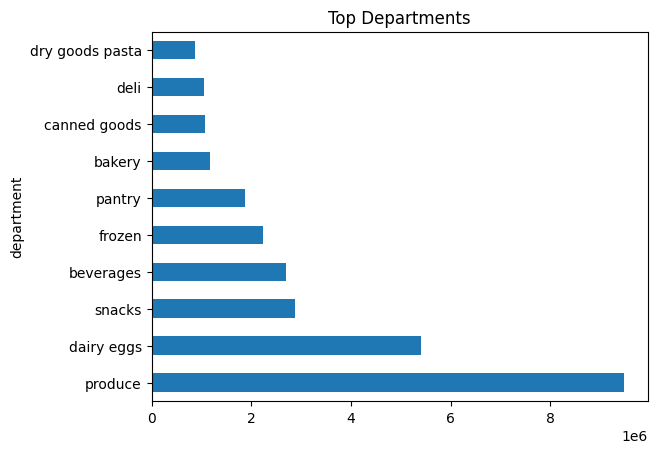

In [59]:
prior_combined['department'].value_counts().head(10).plot(kind='barh', title='Top Departments')

In [60]:
prior_combined

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,25247,prior,24,2,6,21.0,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents,household
32434485,3421083,11352,7,0,25247,prior,24,2,6,21.0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers,snacks
32434486,3421083,4600,8,0,25247,prior,24,2,6,21.0,All Natural French Toast Sticks,52,1,frozen breakfast,frozen
32434487,3421083,24852,9,1,25247,prior,24,2,6,21.0,Banana,24,4,fresh fruits,produce


In [61]:
products_merged

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry
...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits,alcohol
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian,frozen
49685,49686,Artisan Baguette,112,3,bread,bakery
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care,pets


In [62]:
orders_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [63]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [64]:
train_combined

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,fresh vegetables,produce
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,fresh vegetables,produce
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,3421063,14233,3,1,169679,train,30,0,10,4.0,Natural Artesian Water,115,7,water seltzer sparkling water,beverages
1384613,3421063,35548,4,1,169679,train,30,0,10,4.0,Twice Baked Potatoes,13,20,prepared meals,deli
1384614,3421070,35951,1,1,139822,train,15,6,10,8.0,Organic Unsweetened Almond Milk,91,16,soy lactosefree,dairy eggs
1384615,3421070,16953,2,1,139822,train,15,6,10,8.0,Creamy Peanut Butter,88,13,spreads,pantry


In [65]:
prior_combined.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'aisle', 'department'],
      dtype='object')>

In [69]:
columns_to_check = [
    'order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
    'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
    'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
    'aisle', 'department'
]

missing_values = prior_combined[columns_to_check].isnull().sum().sort_values(ascending=False)

# Display missing values
print("📉 Missing Value Report:")
print(missing_values[missing_values > 0])

📉 Missing Value Report:
Series([], dtype: int64)


In [67]:
prior_combined['days_since_prior_order'] = prior_combined['days_since_prior_order'].fillna(0)


In [68]:
train_combined['days_since_prior_order'] = train_combined['days_since_prior_order'].fillna(0)


In [70]:
#no missing value left, imputed with 0 as there were their first orders so it should be logically zero , hehe

*Univariate Analysis*

In [71]:
#distribution of reordered and ordered in prior and train sets

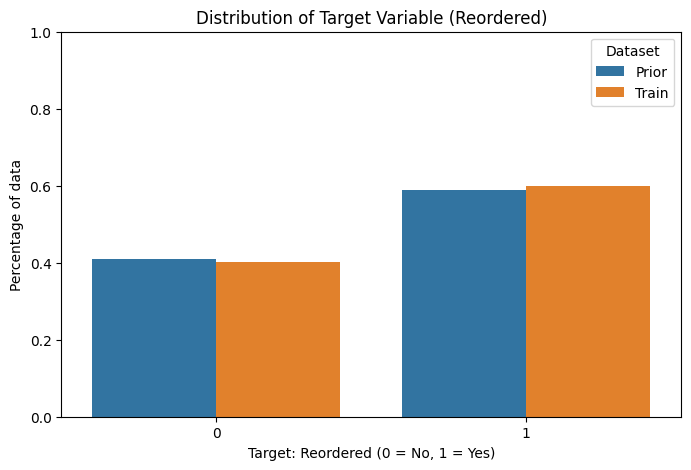

In [72]:
prior_dist = prior_combined['reordered'].value_counts(normalize=True).rename_axis('Reordered').reset_index(name='Percentage')
prior_dist['Dataset'] = 'Prior'

train_dist = train_combined['reordered'].value_counts(normalize=True).rename_axis('Reordered').reset_index(name='Percentage')
train_dist['Dataset'] = 'Train'

# Combine
target_dist = pd.concat([prior_dist, train_dist])

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=target_dist, x='Reordered', y='Percentage', hue='Dataset')
plt.title("Distribution of Target Variable (Reordered)")
plt.ylabel("Percentage of data")
plt.xlabel("Target: Reordered (0 = No, 1 = Yes)")
plt.ylim(0, 1)
plt.show()

In [73]:
total_users = orders['user_id'].nunique()
print(f" Total unique users: {total_users}")

 Total unique users: 206209


Min orders per user: 4
Max orders per user: 100


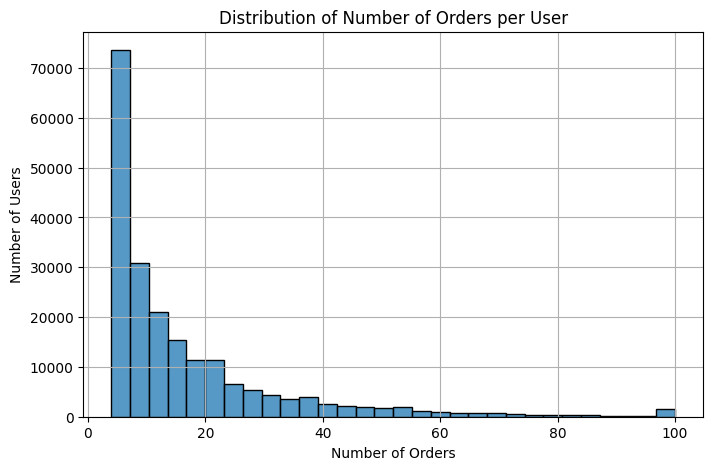

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

orders_per_user = orders.groupby('user_id')['order_number'].max()
print(f"Min orders per user: {orders_per_user.min()}")
print(f"Max orders per user: {orders_per_user.max()}")

# Histogram
plt.figure(figsize=(8,5))
sns.histplot(orders_per_user, bins=30, kde=False)
plt.title("Distribution of Number of Orders per User")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Users")
plt.grid(True)
plt.show()

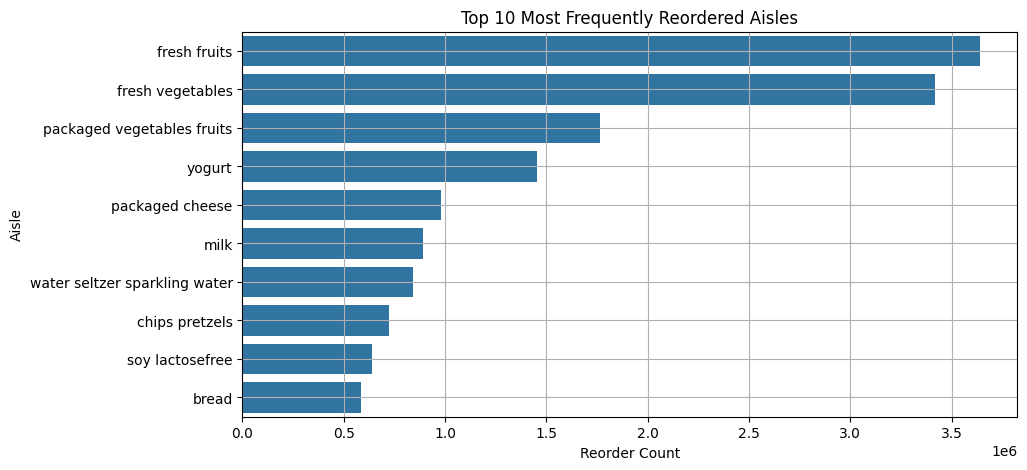

In [76]:
#reordered = prior_combined[prior_combined['reordered'] == 1]
#merged = reordered.merge(products, on='product_id').merge(aisles, on='aisle_id')

aisle_counts = prior_combined['aisle'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=aisle_counts.values, y=aisle_counts.index)
plt.title("Top 10 Most Frequently Reordered Aisles")
plt.xlabel("Reorder Count")
plt.ylabel("Aisle")
plt.grid(True)
plt.show()

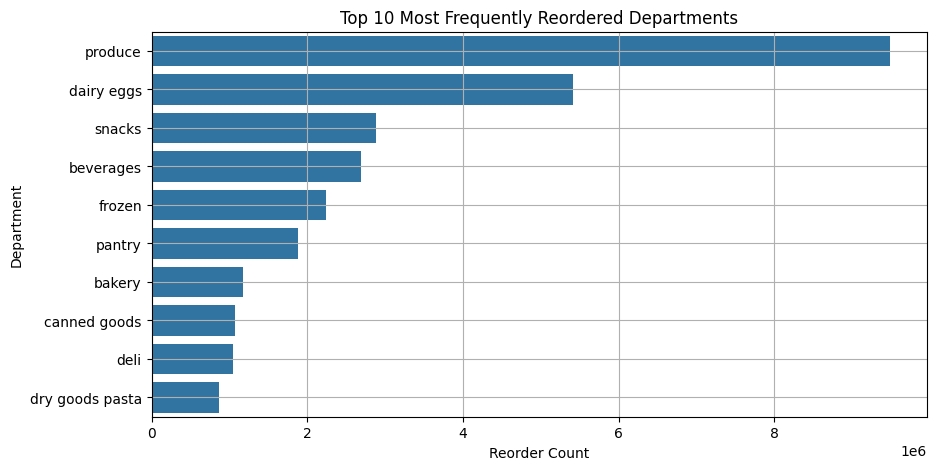

In [77]:
dept_counts = prior_combined['department'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=dept_counts.values, y=dept_counts.index)
plt.title("Top 10 Most Frequently Reordered Departments")
plt.xlabel("Reorder Count")
plt.ylabel("Department")
plt.grid(True)
plt.show()


Avg cart size: 10.09


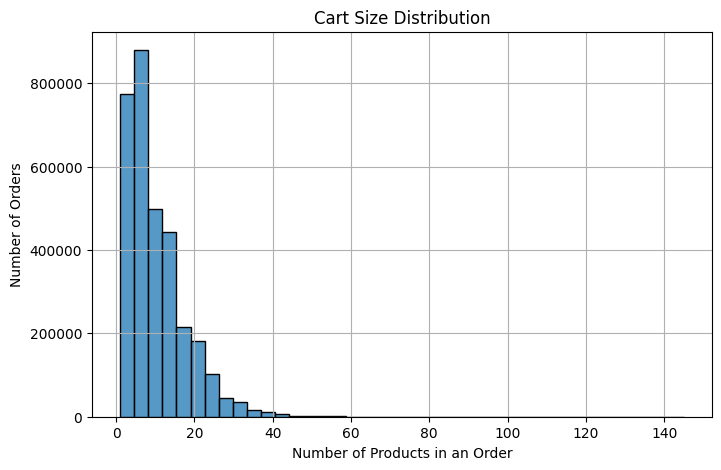

In [78]:
cart_size = orders_prior.groupby('order_id').size()
print(f"Avg cart size: {cart_size.mean():.2f}")

plt.figure(figsize=(8,5))
sns.histplot(cart_size, bins=40)
plt.title("Cart Size Distribution")
plt.xlabel("Number of Products in an Order")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.show()

In [1]:
import xgboost

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/dharmikbhagat/ecommerce-recommender/venv_1/lib/python3.10/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <98D50080-9632-3EA4-B874-146E55453763> /Users/dharmikbhagat/ecommerce-recommender/venv_1/lib/python3.10/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/Users/dharmikbhagat/.pyenv/versions/3.10.13/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/dharmikbhagat/.pyenv/versions/3.10.13/lib/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file), '/Users/dharmikbhagat/.pyenv/versions/3.10.13/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/dharmikbhagat/.pyenv/versions/3.10.13/lib/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file)"]
